**Project Name:** IMPROVING LEAD GENERATION AT EUREKA FORBES USING MACHINE LEARNING ALGORITHMS

**Subject**: Machine Learning - Supervised learning 2

**Group Number:** 1

**Group Members:**

Anjali Muralidharan - 12110006

Sonal Rai - 1211

Vikrant Dhawan - 12110001

Vini Chhajed - 12110080

# Project description :
**Problem description:**
Eureka Forbes was the market leader in water purification business, However they were facing stiff competition from new entrants as well as local players.

The company needed to improve marketing efficiency while keeping the costs under control

They were running digital campaigns, but not leveraging the rich behavioural and visitor acquisition data captured by the firm.

A significant number of digital consumers who visited the Eureka Forbes website but were not converted into prospects.

They were aware that data-driven decision making was the only way to improve their conversion rate while reducing their costs. Hence the company was looking for efficient use of the collected data.


**Description of the dataset:**

1. Pageviews: Number of total pages views per user
2.	Sessions: Number of total sessions per user
3.	air_purifier_page_top: Time spent on air purifier page
4.	Bounces: Total number of single page (or single interaction hit) sessions for the property.
5.	checkout_page_top: Time spent on checkout page
6.	contactus_top: Time spent on contact us page
7.	Country: User's country name
8.	client_id: Unique Identifier of user
9.	customer_service_amc_login_top: Time spent on customer service amc login
10.	customer_service_request_login_top: Time spent on customer service request login
11.	demo_page_top: Time spent on demo page
12.	Device: Users' device category
13.	Dsls: Day since last session
14.	Date: User visit date
15.	fired_DemoReqPg_CallClicks_evt: Event fired for Demo Calls
16.	fired_help_me_buy_evt: Event fired for Help Me Buy CTA
17.	fired_phone_clicks_evt: Event fired for Phone Clicks CTA
18.	goal4Completions: Book Demo Thank You (Goal 4 Completions)
19.	help_me_buy_evt_count: Event count for Help Me Buy CTA
20.	newUser:If userType is New Visitor
21.	offer_page_top: Time spent on offer page
22.	Paid: Users landing from campaign
23.	phone_clicks_evt_count: Event count for Phone Clicks CTA
24.	Region: Users’ region derived from their IP addresses or Geographical IDs. In U.S., a region is a state, New York, for example.
25.	security_solutions_page_top: Time spend on security solutions page
26.	sessionDuration: Total duration (in seconds) of users' sessions.
27.	sourceMedium: Combined values of ga: source and ga: medium.
28.	storelocator_top: Time spent on storelocator page
29.	successbookdemo_top: Time spent on successbookdemo page
30.	vacuum_cleaner_page_top: Time spent on vacuum cleaner page
31.	visited_air_purifier_page: If user visited Air Purifier Page 1 else 0
32.	visited_checkout_page: If user visited Checkout Page 1 else 0
33.	visited_contactus: If user Visited Contactus Page 1 else 0
34.	visited_customer_service_amc_login: If user Visited Customer Service AMC login page 1 else 0
35.	visited_customer_service_request_login: If user Visited Customer Service Request login 1 else 0
36.	visited_demo_page: If user Visited Demo Page 1 else 0


# Importing Libraries and descriptive analysis of dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import set_config
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.metrics import precision_score
from joblib import dump
from joblib import load
from imblearn.under_sampling import RandomUnderSampler
from category_encoders import TargetEncoder
from sklearn.ensemble import RandomForestClassifier

In [151]:
# Mounting drive on Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#importing dataset

# For Colab
#eureka=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/eureka_train.csv')

# For Jupyter notebook
eureka = pd.read_csv("eureka_train.csv")
#eureka.head(10)

In [4]:
eureka.shape

(42264, 48)

In [154]:
eureka['converted'].value_counts()

0    40000
1     2264
Name: converted, dtype: int64

In [155]:
eureka.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42264 entries, 0 to 42263
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   index                                   42264 non-null  int64 
 1   DemoReqPg_CallClicks_evt_count          42264 non-null  int64 
 2   air_purifier_page_top                   42264 non-null  int64 
 3   bookdemo_in_7days                       42264 non-null  int64 
 4   bounces                                 42264 non-null  int64 
 5   checkout_page_top                       42264 non-null  int64 
 6   contactus_top                           42264 non-null  int64 
 7   country                                 42264 non-null  object
 8   customer_service_amc_login_top          42264 non-null  int64 
 9   customer_service_request_login_top      42264 non-null  int64 
 10  demo_page_top                           42264 non-null  int64 
 11  de

In [156]:
eureka.describe()

,index,DemoReqPg_CallClicks_evt_count,air_purifier_page_top,bookdemo_in_7days,bounces,checkout_page_top,contactus_top,customer_service_amc_login_top,customer_service_request_login_top,demo_page_top,...,visited_demo_page,visited_offer_page,visited_security_solutions_page,visited_storelocator,visited_successbookdemo,visited_vacuum_cleaner_page,visited_water_purifier_page,water_purifier_page_top,callclick_in_7days,converted
count,42264.000000,42264.000000,42264.000000,42264.0,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,...,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.0,42264.000000
mean,358421.801202,0.040791,2.338681,0.0,0.580589,4.814878,6.499125,8.703341,1.963491,122.134180,...,0.642627,0.045760,0.007311,0.007193,0.027210,0.075525,0.212829,67.776145,0.0,0.053568
std,205489.638655,0.247443,44.347503,0.0,1.396040,67.353324,69.875796,72.189702,29.398516,321.670443,...,0.479232,0.208967,0.085193,0.084506,0.162697,0.264240,0.409312,291.974952,0.0,0.225166
min,7.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,180008.250000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,361762.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,538395.500000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,81.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,709317.000000,11.000000,3182.000000,0.0,157.000000,3090.000000,2676.000000,2765.000000,1757.000000,11612.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11220.000000,0.0,1.000000


##### EDA

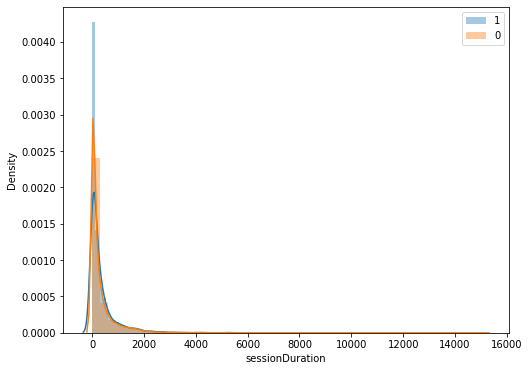

In [157]:
plt.figure(figsize=(8,6))
sn.distplot(eureka[eureka['converted'] == 1]['sessionDuration'].dropna(), label = '1');
sn.distplot(eureka[eureka['converted'] == 0]['sessionDuration'].dropna(), label = '0');
plt.legend()

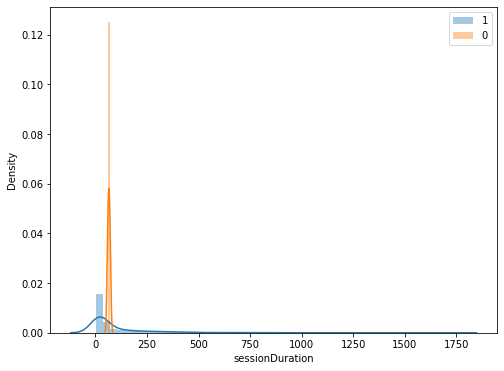

In [158]:
plt.figure(figsize=(8,6))
sn.distplot(eureka[eureka['pageviews'] == 1]['sessionDuration'].dropna(), label = '1');
sn.distplot(eureka[eureka['pageviews'] == 0]['sessionDuration'].dropna(), label = '0');
plt.legend()

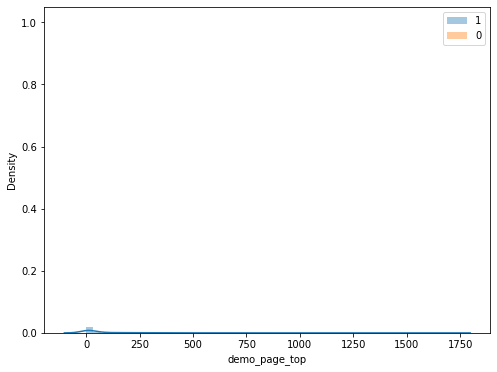

In [159]:
plt.figure(figsize=(8,6))
sn.distplot(eureka[eureka['pageviews'] == 1]['demo_page_top'].dropna(), label = '1');
sn.distplot(eureka[eureka['pageviews'] == 0]['demo_page_top'].dropna(), label = '0');
plt.legend()

# Data Exploration Q/A:

1. What is the difference in percentage of conversion by domestic compared to international clients?

In [160]:
domesticConversion = round(100*eureka.loc[eureka['country'] == 'd', 'converted'].sum()/eureka.loc[eureka['country'] == 'd', 'converted'].count(),3)
print(domesticConversion)

internationalConversion = round(100*eureka.loc[eureka['country'] == 'i', 'converted'].sum()/eureka.loc[eureka['country'] == 'i', 'converted'].count(),3)
print(internationalConversion)
 
print("Domestic Conversion: ", domesticConversion )
print("International Conversion: ", internationalConversion )

print("Difference in % of Domestic Conversion and International Conversion: ", 
      float(domesticConversion) - float(internationalConversion))

5.304
7.12
Domestic Conversion:  5.304
International Conversion:  7.12
Difference in % of Domestic Conversion and International Conversion:  -1.8159999999999998


2. What are the top 10 source mediums of users visiting the site?

In [161]:
srcDF = eureka.groupby(['sourceMedium'])['sourceMedium'].size().sort_values(ascending=False)
srcDF.head(10)

sourceMedium
google / cpc                      30428
google / organic                   8276
(direct) / (none)                  2734
facebook / social                   329
bing / organic                      143
Quora / (not set)                    48
gaintheory / amc_sms                 37
draquaguard.co.in / referral         28
yahoo / organic                      27
in.search.yahoo.com / referral       27
Name: sourceMedium, dtype: int64

3. Is there any difference in time spent on the water purifier page between users who converted and users who did not convert?

In [162]:
convertedTimeSpent = eureka.loc[(eureka['visited_water_purifier_page'] == 1) & (eureka['converted'] == 1), 'water_purifier_page_top'].mean()
timeSpentOthers = eureka.loc[(eureka['visited_water_purifier_page'] == 0) & (eureka['converted'] == 1), 'water_purifier_page_top'].mean()

print("Difference in time spent on the water purifier page between users who converted and users who did not convert",
      float(convertedTimeSpent)-float(timeSpentOthers)) 

Difference in time spent on the water purifier page between users who converted and users who did not convert 425.7886904761905


Hence we can conclude that there is no difference in the time spent

4.Kashif has the following claims from this business understanding. How do you test his claims and make necessary conclusions?
    
- Customers using mobile, desktop, and tablet are equally distributed.
- Customers who convert spend more time on the website.


In [163]:
eureka.groupby(['device'])['device'].size()

device
desktop     5545
mobile     36370
tablet       349
Name: device, dtype: int64

From the above data we see that customers using mobile, desktop and tablet are not equally distributed. Most of the customers use mobiles. Least used are tablets.

In [164]:
eureka.loc[eureka['converted'] == 1, 'sessionDuration'].mean()

340.9633392226148

In [165]:
eureka.loc[eureka['converted'] == 0, 'sessionDuration'].mean()

313.053625

Yes, customers who convert do spend more time on the website as we can see from the above data. 

# Classification Modelling

##### Algorithm followed while executing each experiment:

1. Data cleaning and preprocessing by checking for missing, NA and unique values
2. Splitting the cleaned and preprocessed data into train and test datasets
3. Separating numerical and categorical data for further work
4. Apply sampling techniques to remove data imbalance
5. Encode the numerical and categorical variables separately using specific methods
6. Transform the encoded data and store it as a pre processor to apply in the pipeline
7. Choose a model and fit this model on the balanced data. Then create a pipeline where the preprocessor is the encoding technique used for that experiment
8. Apply K fold cross validation with cv = 10 to obtain precision scores on the train data
9. Apply Grid search to optimize the paramters for the model and then run the model again with the chosen optimal paramters
10. Obtain the precision scores on the test data for every experiment
11. Choose the model that gives the highest precision on test data from all the experiments
12. Apply feature selection using this finalized model and compare the precision before and after feature selection.
13. Creating the pickle file

##### Checking missing values

In [4]:
#eureka = pd.read_csv("eureka_train.csv")
columns_names = eureka.columns
percent_missing = eureka.isnull().sum() * 100 / len(eureka)
missing_value_df = pd.DataFrame({'column_name': columns_names,
                                 'percent_missing': percent_missing})

In [5]:
missing_value_df.sort_values('percent_missing', ascending = False)
#no missing vaues

,column_name,percent_missing
index,index,0.0
DemoReqPg_CallClicks_evt_count,DemoReqPg_CallClicks_evt_count,0.0
security_solutions_page_top,security_solutions_page_top,0.0
sessionDuration,sessionDuration,0.0
sessions,sessions,0.0
sourceMedium,sourceMedium,0.0
storelocator_top,storelocator_top,0.0
successbookdemo_top,successbookdemo_top,0.0
vacuum_cleaner_page_top,vacuum_cleaner_page_top,0.0
visited_air_purifier_page,visited_air_purifier_page,0.0


In [6]:
#Dropping index and variable with no meaningful information
columns_drop = ["index","bookdemo_in_7days","goal3Completions","goal7Completions","callclick_in_7days"]
eureka = eureka.drop(columns_drop ,axis=1)

##### Defining X and Y datasets and splitting into test and train

In [7]:
X = eureka.drop("converted",axis=1)
y = pd.DataFrame(eureka['converted'])

In [8]:
#Dividing into test and train (for smote and rus)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 100)

In [10]:
X_train.shape

(33811, 42)

In [11]:
y_train.value_counts()

converted
0            32026
1             1785
dtype: int64

In [12]:
X_test.shape

(8453, 42)

##### Creating the list of input features 

In [9]:
X_features = eureka.drop("converted",axis=1).columns
X_features.tolist()

#Categorical variables 
cat_vars =['country', 'device', 'fired_DemoReqPg_CallClicks_evt','fired_help_me_buy_evt', 'fired_phone_clicks_evt',
'newUser','paid', 'region','sourceMedium','visited_air_purifier_page',
'visited_checkout_page', 'visited_contactus', 'visited_customer_service_amc_login','visited_customer_service_request_login',
'visited_demo_page','visited_offer_page','visited_security_solutions_page','visited_storelocator',
'visited_successbookdemo','visited_vacuum_cleaner_page','visited_water_purifier_page']

eureka.columns

index_no = []
for i in cat_vars:
  index_no.append(eureka.columns.get_loc(i))

In [10]:
#defining numerical variables
num_vars = list(set(X_features) - set(cat_vars))

In [15]:
eureka[cat_vars].describe()

,fired_DemoReqPg_CallClicks_evt,fired_help_me_buy_evt,fired_phone_clicks_evt,newUser,paid,visited_air_purifier_page,visited_checkout_page,visited_contactus,visited_customer_service_amc_login,visited_customer_service_request_login,visited_demo_page,visited_offer_page,visited_security_solutions_page,visited_storelocator,visited_successbookdemo,visited_vacuum_cleaner_page,visited_water_purifier_page
count,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000
mean,0.034592,0.042613,0.038662,0.617523,0.737649,0.016799,0.014764,0.029126,0.063364,0.017888,0.642627,0.045760,0.007311,0.007193,0.027210,0.075525,0.212829
std,0.182746,0.201986,0.192790,0.485998,0.439918,0.128520,0.120610,0.168163,0.243619,0.132544,0.479232,0.208967,0.085193,0.084506,0.162697,0.264240,0.409312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
eureka[num_vars].describe()

,security_solutions_page_top,checkout_page_top,successbookdemo_top,water_purifier_page_top,offer_page_top,demo_page_top,sessions,DemoReqPg_CallClicks_evt_count,storelocator_top,bounces,...,air_purifier_page_top,help_me_buy_evt_count,pageviews,customer_service_request_login_top,vacuum_cleaner_page_top,dsls,contactus_top,customer_service_amc_login_top,phone_clicks_evt_count,goal4Completions
count,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,...,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000,42264.000000
mean,1.216520,4.814878,2.101316,67.776145,3.626443,122.134180,1.764741,0.040791,2.004448,0.580589,...,2.338681,0.058915,5.134464,1.963491,20.448183,3.478019,6.499125,8.703341,0.046399,0.032037
std,40.775299,67.353324,27.335637,291.974952,41.375105,321.670443,1.674970,0.247443,42.134135,1.396040,...,44.347503,0.335858,5.598321,29.398516,145.973190,13.471843,69.875796,72.189702,0.267581,0.192532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,81.000000,2.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,5614.000000,3090.000000,1597.000000,11220.000000,1840.000000,11612.000000,188.000000,11.000000,2378.000000,157.000000,...,3182.000000,12.000000,266.000000,1757.000000,5358.000000,182.000000,2676.000000,2765.000000,11.000000,11.000000


##### Handling data imbalance : 
The techniques that are applied on the training dataset to adjust the class distribution and modify the unbalanced dataset to balanced. This is applied only on the training dataset and not the test or validate dataset, as the train dataset is used by the machine algorithms to learn the model. This removes the bias from the model fit and the evaluation is performed on the dataset that continues to be the real representation of the target domain.
2 techniques are used,

1. **Oversampling and Undersampling** - 
Oversampling technique is used when insufficient amount of data is collected. In this technique the minority class is either duplicated or new examples are synthesized from the examples available in the minority class. Over sampling method is more preferable than under sampling as under sampling can result in the loss of important data.
Undersampling method is used when large amount of data is collected than what is ideal.In this technique data is either deleted or only a subset of examples is selected from the majority class in the train dataset. 

2. **SMOTE** -
Synthetic Minority Oversampling Technique(SMOTE) is the most popular and also considered as the most successful oversampling. In this technique new samples are created in the minority class by synthesizing old samples. It helps to overcome the overfitting problem caused by the random oversampling. 

3. **Random Under Sampling** -
It is the simplest undersampling method that deletes examples from the majority class randomly in the training dataset. In this random samples of the majority class are considered in equal ratio with the minority class to deal with data imbalance. This process is continued until each class has equal data samples.

In [11]:
#Oversampling and undersampling

# Separate the case of yes-subscribes and no-subscribes
X_train_pos = X_train[y.squeeze() == 1]
X_train_neg = X_train[y.squeeze() == 0]


##Upsample the yes-subscribed cases.
X_train_pos_upsampled = resample(X_train_pos, 
                                replace=True,     # sample with replacement
                                n_samples=18000) 

##Upsample the yes-subscribed cases.
X_train_neg_downsampled = resample(X_train_neg, 
                                  replace=False,     # sample without replacement
                                  n_samples=18000) 

# Combine majority class with upsampled minority class
X_train_new = pd.concat([X_train_pos_upsampled, X_train_neg_downsampled])

#defing Y labels
y_labels = [1] * 18000 + [0] * 18000
y_test_2= pd.DataFrame(y_labels,columns =['converted'])

X_train_new_2 = pd.concat([X_train_new.reset_index(drop=True), y_test_2.reset_index(drop=True)], axis=1)
X_train_new_2

#Shuffle
X_train_shuffle = shuffle(X_train_new_2)

#Redividing into x and y
X_train_sampling = X_train_shuffle[X_features]
y_train_sampling = X_train_shuffle['converted']

print(X_train_sampling.shape)
print(y_train_sampling.shape)

(36000, 42)
(36000,)


In [12]:
#SMOTE

sm = SMOTENC(categorical_features= index_no, random_state=2)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print(y_train_smote.groupby(['converted']).size())

print(X_train_smote.shape)
print(y_train_smote.shape)

converted
0    32026
1    32026
dtype: int64
(64052, 42)
(64052, 1)


In [13]:
#Random Under sampling

sm = RandomUnderSampler(random_state=2,sampling_strategy='auto',replacement=False) 
X_train_rus, y_train_rus = sm.fit_resample(X_train, y_train)

print(X_train_rus.shape)
print(X_train_rus.shape)

(3570, 42)
(3570, 42)


##### Defining transformations:
3 encoding techniques are used,

1. **One hot encoding** - 
It is a encoding method also known as technique for dummy variable creation , It is used to convert categorical variables into format that can be readily used by machine learning algorithms.
Each categorical value is converted into a new categorical column and assign a binary value of 1 or 0 to those columns.
(n-1) dummy variables for each categorical variable with n categories are created.

2. **Standard Scaler** -
Standard scalar standardizes features of the data set by scaling to unit variance and removing the mean (optionally) using column summary statistics on the samples in the training set. 
Weight of evidence encoding - It is an encoding method that measures the strength of a grouping technique to separate good and bad

3. **Weight Of Evidence encoding**:
WOE is the natural logarithm (ln) of the probability that the target equals 1 given particular categorical value divided by the probability of the target equals 0 given the same categorical value. The weight of evidence tells the predictive power of an independent variable in relation to the dependent variable

4. **Target encoding** - 
The main idea behind the target encoder is to encode the categories by replacing them for a measurement of the effect they might have on the target.

In [14]:
#OHE

ohe_encoder = OneHotEncoder(handle_unknown='ignore')

In [15]:
#Standard Scaler

scaler = StandardScaler()

In [16]:
#Weight of Evidence Encoding

woe = ce.WOEEncoder(cols= cat_vars , random_state=100)

In [17]:
#Target Encoder

target = TargetEncoder()
target.fit(X_train[X_features], y_train)

TargetEncoder(cols=['country', 'device', 'region', 'sourceMedium'])

##### Creating pipelines for different combinations of transformation techniques used

In [18]:
scaler_transformer = Pipeline( steps = [('scaler', scaler)])
ohe_transformer = Pipeline( steps = [('ohencoder', ohe_encoder)])
woe_transformer = Pipeline( steps = [('Weight of Evidence', woe)]) 
target_transformer = Pipeline( steps = [('target', target)])

In [19]:
preprocessor1 = ColumnTransformer(transformers=[('numvars', scaler_transformer,num_vars),('catvars', ohe_transformer, cat_vars)])
preprocessor2 = ColumnTransformer(transformers=[('standardscaler', scaler_transformer,num_vars),('woe_encoding', woe_transformer, cat_vars)])
preprocessor3 = ColumnTransformer(transformers=[('numvars', scaler_transformer, num_vars),('target', target_transformer, cat_vars)])

##### Machine learning models used to run various experiments:

1. **Logistic Regression** -
Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.
The dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no). Mathematically, a logistic regression model predicts P(Y=1) as a function of X. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.

2. **K Nearest Neighbours** -
A k-nearest-neighbor algorithm, often abbreviated k-nn, is an approach to data classification that estimates how likely a data point is to be a member of one group or the other depending on what group the data points nearest to it are in.
The k-nearest-neighbor is an example of a "lazy learner" algorithm, meaning that it does not build a model using the training set until a query of the data set is performed

3. **Decision Tree** - 
Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label

4. **Support Vector Machines** - 
Support Vector Machine(SVM) is a supervised machine learning algorithm used for both. The objective of SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points. The dimension of the hyperplane depends upon the number of features. 

5. **XG Boost Classifier** - 
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks

6. **Random Forest** - 
Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

7. **Gradient Boost** - 
Gradient boosting algorithm can be used for predicting not only continuous target variable (as a Regressor) but also categorical target variable (as a Classifier). When it is used as a regressor, the cost function is Mean Square Error (MSE) and when it is used as a classifier then the cost function is Log loss

##### Experiment 1 - Random Undersampling - > Target encoding, Scaler - > Logistic Regression 

In [40]:
LogReg = LogisticRegression()
LogReg1 = Pipeline(steps=[('preprocessor', preprocessor3), ("logistic", LogReg)])

In [41]:
LogReg1.fit(X_train_rus, y_train_rus)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['demo_page_top',
                                                   'contactus_top',
                                                   'successbookdemo_top',
                                                   'dsls',
                                                   'customer_service_amc_login_top',
                                                   'air_purifier_page_top',
                                                   'sessions',
                                                   'security_solutions_page_top',
                                                   'bounces', 'offer_page_top',
                                                   'pageviews',
                      

In [42]:
set_config(display='diagram') 
LogReg1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['demo_page_top',
                                                   'contactus_top',
                                                   'successbookdemo_top',
                                                   'dsls',
                                                   'customer_service_amc_login_top',
                                                   'air_purifier_page_top',
                                                   'sessions',
                                                   'security_solutions_page_top',
                                                   'bounces', 'offer_page_top',
                                                   'pageviews',
                                                   'customer_service_request_logi...
                                                   'visited_air_purifier_page',
                                                   'visited_checkout_page',
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('logistic', LogisticRegression())])

In [43]:
#K Fold Cross Validation
scores = cross_val_score( LogReg1,
                          X_train_rus,
                          y_train_rus,
                          cv = 10,
                          scoring = 'precision')

In [44]:
scores

array([0.64942529, 0.67204301, 0.66470588, 0.71005917, 0.66486486,
       0.68208092, 0.68539326, 0.67613636, 0.6875    , 0.64480874])

In [45]:
scores.mean()

0.673701750701267

In [ ]:
scores.std()

0.018196162134126594

In [ ]:
grid = {'logistic__penalty' : ['l1', 'l2'],
        'logistic__C' : [10, 1.0, 0.1],
        'logistic__solver' : ['newton-cg', 'lbfgs', 'liblinear','sag']}
logreg_cv = GridSearchCV(LogReg1 , param_grid = grid, cv=10, scoring = 'precision', verbose = True, n_jobs = -1)


In [ ]:
logreg_cv.fit(X_train_sampling,y_train_sampling)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numvars',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['dsls',
                                                                          'vacuum_cleaner_page_top',
                                                                          'demo_page_top',
                                                                          'offer_page_top',
                                                                          'checkout_page_top',
                                                                          'goal4Completions',
                                                                          'phone_clicks_evt_count',
                                                                          'storelocator_top',
                                                                          'successbookdemo_top',
                                                                          'sessions',
                                                                          'pageviews',
                                                                          'sess...
                                                                          'visited_security_solutions_page',
                                                                          'visited_storelocator',
                                                                          'visited_successbookdemo',
                                                                          'visited_vacuum_cleaner_page',
                                                                          'visited_water_purifier_page'])])),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [10, 1.0, 0.1],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                              'sag']},
             scoring='precision', verbose=True)

In [ ]:
logreg_cv.best_params_

{'logistic__C': 0.1,
 'logistic__penalty': 'l2',
 'logistic__solver': 'newton-cg'}

In [ ]:
logreg_cv.best_score_

0.6795821109435497

In [46]:
#Creating the final model
final_model = LogisticRegression(C = 0.1, 
                                 penalty = 'l2', 
                                 solver = 'newton-cg')

In [47]:
LogReg_final = Pipeline(steps=[('preprocessor', preprocessor3),
                          ('logistic', final_model)])

In [48]:
LogReg_final.fit(X_train_rus, y_train_rus)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['demo_page_top',
                                                   'contactus_top',
                                                   'successbookdemo_top',
                                                   'dsls',
                                                   'customer_service_amc_login_top',
                                                   'air_purifier_page_top',
                                                   'sessions',
                                                   'security_solutions_page_top',
                                                   'bounces', 'offer_page_top',
                                                   'pageviews',
                                                   'customer_service_request_logi...
                                                   'visited_checkout_page',
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('logistic', LogisticRegression(C=0.1, solver='newton-cg'))])

In [49]:
LogReg_pred = LogReg_final.predict(X_test[X_features])
cm_v1 = confusion_matrix(y_test, LogReg_pred, labels = [1, 0])
cm_v1

array([[ 324,  155],
       [2557, 5417]])

In [50]:
# Final Precision

print(precision_score(y_test, LogReg_pred))
precision = precision_score(y_test, LogReg_pred)

0.11246095105866019


##### Experiment 2 - SMOTE -> Weight of evidence encoding, Scaler -> Logistic Regression 

In [51]:
LogReg = LogisticRegression()
LogReg2 = Pipeline(steps=[('preprocessor', preprocessor2), ('logistic', LogReg)])

In [52]:
LogReg2.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['demo_page_top',
                                                   'contactus_top',
                                                   'successbookdemo_top',
                                                   'dsls',
                                                   'customer_service_amc_login_top',
                                                   'air_purifier_page_top',
                                                   'sessions',
                                                   'security_solutions_page_top',
                                                   'bounces', 'offer_page_top',
                                                   'pageviews',
                                                   'customer_service_reque...
                                                   'visited_air_purifier_page',
                                                   'visited_checkout_page',
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('logistic', LogisticRegression())])

In [53]:
set_config(display='diagram') 
LogReg2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['demo_page_top',
                                                   'contactus_top',
                                                   'successbookdemo_top',
                                                   'dsls',
                                                   'customer_service_amc_login_top',
                                                   'air_purifier_page_top',
                                                   'sessions',
                                                   'security_solutions_page_top',
                                                   'bounces', 'offer_page_top',
                                                   'pageviews',
                                                   'customer_service_reque...
                                                   'visited_air_purifier_page',
                                                   'visited_checkout_page',
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('logistic', LogisticRegression())])

In [54]:
# K Fold Cross Validation
scores = cross_val_score( LogReg2,
                          X_train_smote,
                          y_train_smote,
                          cv = 10,
                          scoring = 'precision')

In [55]:
scores

array([0.63761468, 0.66729424, 0.65909091, 0.65962699, 0.64830842,
       0.66497054, 0.65127263, 0.65213882, 0.65157532, 0.65773575])

In [ ]:
scores.mean()

0.6549628307982036

In [ ]:
scores.std()

0.008228060951581791

In [ ]:
grid = {'logistic__penalty' : ['l1', 'l2'],
        'logistic__C' : [10, 1.0, 0.1],
        'logistic__solver' : ['newton-cg', 'lbfgs', 'liblinear','sag']}
logreg_cv = GridSearchCV(LogReg2 , param_grid = grid, cv=10, scoring = 'precision', verbose = True, n_jobs = -1)


In [ ]:
logreg_cv.fit(X_train_smote,y_train_smote)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['dsls',
                                                                          'vacuum_cleaner_page_top',
                                                                          'demo_page_top',
                                                                          'offer_page_top',
                                                                          'checkout_page_top',
                                                                          'goal4Completions',
                                                                          'phone_clicks_evt_count',
                                                                          'storelocator_top',
                                                                          'successbookdemo_top',
                                                                          'sessions',
                                                                          'pageviews...
                                                                          'visited_security_solutions_page',
                                                                          'visited_storelocator',
                                                                          'visited_successbookdemo',
                                                                          'visited_vacuum_cleaner_page',
                                                                          'visited_water_purifier_page'])])),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': [10, 1.0, 0.1],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['newton-cg', 'lbfgs', 'liblinear',
                                              'sag']},
             scoring='precision', verbose=True)

In [ ]:
logreg_cv.best_params_

{'logistic__C': 10, 'logistic__penalty': 'l2', 'logistic__solver': 'newton-cg'}

In [ ]:
logreg_cv.best_score_

0.655136180520395

In [56]:
#Creating the final model
final_model = LogisticRegression(C = 10, 
                                 penalty = 'l2', 
                                 solver = 'newton-cg')

In [57]:
LogReg_final = Pipeline(steps=[('preprocessor', preprocessor2),
                          ('logistic', final_model)])

In [58]:
LogReg_final.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['demo_page_top',
                                                   'contactus_top',
                                                   'successbookdemo_top',
                                                   'dsls',
                                                   'customer_service_amc_login_top',
                                                   'air_purifier_page_top',
                                                   'sessions',
                                                   'security_solutions_page_top',
                                                   'bounces', 'offer_page_top',
                                                   'pageviews',
                                                   'customer_service_reque...
                                                   'visited_checkout_page',
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('logistic', LogisticRegression(C=10, solver='newton-cg'))])

In [59]:
LogReg_pred = LogReg_final.predict(X_test)
cm_v1 = confusion_matrix(y_test, LogReg_pred, labels = [1, 0])
cm_v1

array([[ 300,  179],
       [3261, 4713]])

In [60]:
# Final Precision

print(precision_score(y_test, LogReg_pred))
precision = precision_score(y_test, LogReg_pred)

0.08424599831508003


##### Experiment 3 - Random Undersampling - > Target, Scaler - > KNN 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=20, weights='distance')

In [ ]:
knn_v1 = Pipeline(steps=[('preprocessor', preprocessor3),
                          ('knn', knn)])

In [ ]:
knn_v1.fit(X_train_rus, y_train_rus)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['dsls',
                                                   'vacuum_cleaner_page_top',
                                                   'demo_page_top',
                                                   'offer_page_top',
                                                   'checkout_page_top',
                                                   'goal4Completions',
                                                   'phone_clicks_evt_count',
                                                   'storelocator_top',
                                                   'successbookdemo_top',
                                                   'sessions', 'pageviews',
                                                   'sessionDuration', 'bounces',
                                                   'help_...
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('knn',
                 KNeighborsClassifier(n_neighbors=20, weights='distance'))])

In [ ]:
set_config(display='diagram')

In [ ]:
knn_v1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['dsls',
                                                   'vacuum_cleaner_page_top',
                                                   'demo_page_top',
                                                   'offer_page_top',
                                                   'checkout_page_top',
                                                   'goal4Completions',
                                                   'phone_clicks_evt_count',
                                                   'storelocator_top',
                                                   'successbookdemo_top',
                                                   'sessions', 'pageviews',
                                                   'sessionDuration', 'bounces',
                                                   'help_...
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('knn',
                 KNeighborsClassifier(n_neighbors=20, weights='distance'))])

In [ ]:
#K Fold Cross Validation
scores = cross_val_score( knn_v1,
                          X_train_rus,
                          y_train_rus,
                          cv = 10,
                          scoring = 'precision')

In [ ]:
scores

array([0.675     , 0.65497076, 0.64242424, 0.65454545, 0.65425532,
       0.68292683, 0.68571429, 0.67816092, 0.66470588, 0.64634146])

In [ ]:
scores.mean()

0.6639045156642935

In [ ]:
#Grid Search
knn_params = { "knn__n_neighbors": [5, 20, 25],
               "knn__weights": ['uniform', 'distance'],
               "knn__metric": ['minkowski', 'euclidean']}

In [ ]:
knn_grid_v1 = GridSearchCV(knn_v1,
                           param_grid=knn_params,
                           cv = 10,
                           scoring = 'precision')

In [ ]:
knn_grid_v1.fit(X_train_rus, y_train_rus)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numvars',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['dsls',
                                                                          'vacuum_cleaner_page_top',
                                                                          'demo_page_top',
                                                                          'offer_page_top',
                                                                          'checkout_page_top',
                                                                          'goal4Completions',
                                                                          'phone_clicks_evt_count',
                                                                          'storelocator_top',
                                                                          'successbookdemo_top',
                                                                          'sessions',
                                                                          'pageviews',
                                                                          'sessi...
                                                                          'visited_security_solutions_page',
                                                                          'visited_storelocator',
                                                                          'visited_successbookdemo',
                                                                          'visited_vacuum_cleaner_page',
                                                                          'visited_water_purifier_page'])])),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=20,
                                                             weights='distance'))]),
             param_grid={'knn__metric': ['minkowski', 'euclidean'],
                         'knn__n_neighbors': [5, 20, 25],
                         'knn__weights': ['uniform', 'distance']},
             scoring='precision')

In [ ]:
knn_grid_v1.best_params_

{'knn__metric': 'minkowski', 'knn__n_neighbors': 20, 'knn__weights': 'uniform'}

In [ ]:
knn_grid_v1.best_score_

0.6863975078359051

In [ ]:
final_model = KNeighborsClassifier(n_neighbors = knn_grid_v1.best_params_['knn__n_neighbors'], 
                                  weights = knn_grid_v1.best_params_['knn__weights'], 
                                  metric = knn_grid_v1.best_params_['knn__metric'])

In [ ]:
knn_final = Pipeline(steps=[('preprocessor', preprocessor3),
                          ('knn', final_model)])

In [ ]:
knn_final.fit(X_train_rus, y_train_rus)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['dsls',
                                                   'vacuum_cleaner_page_top',
                                                   'demo_page_top',
                                                   'offer_page_top',
                                                   'checkout_page_top',
                                                   'goal4Completions',
                                                   'phone_clicks_evt_count',
                                                   'storelocator_top',
                                                   'successbookdemo_top',
                                                   'sessions', 'pageviews',
                                                   'sessionDuration', 'bounces',
                                                   'help_...
                                                   'visited_checkout_page',
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('knn', KNeighborsClassifier(n_neighbors=20))])

In [ ]:
knn_pred = knn_final.predict(X_test)

In [ ]:
knn_v1 = confusion_matrix(y_test, knn_pred, labels = [1, 0])
knn_v1

array([[ 298,  181],
       [2326, 5648]])

In [ ]:
print(precision_score(y_test, knn_pred))
precision = precision_score(y_test, knn_pred)

0.11356707317073171


##### Experiment 4 - SMOTE - > WOE encoding, Scaler - > KNN 

In [ ]:
knn_v2 = Pipeline(steps=[('preprocessor', preprocessor2),
                          ('knn', knn)])

In [ ]:
knn_v2.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['dsls',
                                                   'vacuum_cleaner_page_top',
                                                   'demo_page_top',
                                                   'offer_page_top',
                                                   'checkout_page_top',
                                                   'goal4Completions',
                                                   'phone_clicks_evt_count',
                                                   'storelocator_top',
                                                   'successbookdemo_top',
                                                   'sessions', 'pageviews',
                                                   'sessionDuration', 'bounces'...
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('knn',
                 KNeighborsClassifier(n_neighbors=20, weights='distance'))])

In [ ]:
set_config(display='diagram')
knn_v2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['dsls',
                                                   'vacuum_cleaner_page_top',
                                                   'demo_page_top',
                                                   'offer_page_top',
                                                   'checkout_page_top',
                                                   'goal4Completions',
                                                   'phone_clicks_evt_count',
                                                   'storelocator_top',
                                                   'successbookdemo_top',
                                                   'sessions', 'pageviews',
                                                   'sessionDuration', 'bounces'...
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('knn',
                 KNeighborsClassifier(n_neighbors=20, weights='distance'))])

In [ ]:
# K Fold Cross Validation
scores_2 = cross_val_score( knn_v2,
                          X_train_smote,
                          y_train_smote,
                          cv = 10,
                          scoring = 'precision')

In [ ]:
scores_2

array([0.74707471, 0.77815433, 0.77597911, 0.778826  , 0.76733954,
       0.77259703, 0.76779221, 0.76874672, 0.76807072, 0.7844691 ])

In [ ]:
# Grid Search
knn_params = { "knn__n_neighbors": [5,10, 20, 25],
               "knn__weights": ['uniform', 'distance'],
               "knn__metric": ['minkowski', 'euclidean']}

In [ ]:
knn_grid_v2 = GridSearchCV(knn_v2,
                           param_grid=knn_params,
                           cv = 10,
                           scoring = 'precision')

In [ ]:
knn_grid_v2.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['dsls',
                                                                          'vacuum_cleaner_page_top',
                                                                          'demo_page_top',
                                                                          'offer_page_top',
                                                                          'checkout_page_top',
                                                                          'goal4Completions',
                                                                          'phone_clicks_evt_count',
                                                                          'storelocator_top',
                                                                          'successbookdemo_top',
                                                                          'sessions',
                                                                          'pageviews'...
                                                                          'visited_security_solutions_page',
                                                                          'visited_storelocator',
                                                                          'visited_successbookdemo',
                                                                          'visited_vacuum_cleaner_page',
                                                                          'visited_water_purifier_page'])])),
                                       ('knn',
                                        KNeighborsClassifier(n_neighbors=20,
                                                             weights='distance'))]),
             param_grid={'knn__metric': ['minkowski', 'euclidean'],
                         'knn__n_neighbors': [5, 10, 20, 25],
                         'knn__weights': ['uniform', 'distance']},
             scoring='precision')

In [ ]:
knn_grid_v2.best_params_

{'knn__metric': 'minkowski', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}

In [ ]:
knn_grid_v2.best_score_

0.7972248996448331

In [ ]:
final_model_2 = KNeighborsClassifier(n_neighbors = knn_grid_v2.best_params_['knn__n_neighbors'], 
                                  weights = knn_grid_v2.best_params_['knn__weights'], 
                                  metric = knn_grid_v2.best_params_['knn__metric'])

In [ ]:
knn_final_2 = Pipeline(steps=[('preprocessor', preprocessor2),
                          ('knn', final_model_2)])

In [ ]:
knn_final_2.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['dsls',
                                                   'vacuum_cleaner_page_top',
                                                   'demo_page_top',
                                                   'offer_page_top',
                                                   'checkout_page_top',
                                                   'goal4Completions',
                                                   'phone_clicks_evt_count',
                                                   'storelocator_top',
                                                   'successbookdemo_top',
                                                   'sessions', 'pageviews',
                                                   'sessionDuration', 'bounces'...
                                                   'visited_checkout_page',
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('knn', KNeighborsClassifier(weights='distance'))])

In [ ]:
knn_pred_2 = knn_final_2.predict(X_test)

In [ ]:
knn_v1 = confusion_matrix(y_test, knn_pred, labels = [1, 0])
knn_v2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['dsls',
                                                   'vacuum_cleaner_page_top',
                                                   'demo_page_top',
                                                   'offer_page_top',
                                                   'checkout_page_top',
                                                   'goal4Completions',
                                                   'phone_clicks_evt_count',
                                                   'storelocator_top',
                                                   'successbookdemo_top',
                                                   'sessions', 'pageviews',
                                                   'sessionDuration', 'bounces'...
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('knn',
                 KNeighborsClassifier(n_neighbors=20, weights='distance'))])

In [ ]:
print(precision_score(y_test, knn_pred_2))
precision = precision_score(y_test, knn_pred_2)

0.09312398484028153


##### Experiment 5 -  Undersampling OverSampling - > One hot enconding , Scaler - > Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(max_depth = 10,criterion = 'gini')

In [ ]:
tree_v1 = Pipeline(steps=[('preprocessor', preprocessor1),
                          ('DecisionTree', tree)])

In [ ]:
tree_v1.fit(X_train_sampling, y_train_sampling)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['dsls',
                                                   'vacuum_cleaner_page_top',
                                                   'demo_page_top',
                                                   'offer_page_top',
                                                   'checkout_page_top',
                                                   'goal4Completions',
                                                   'phone_clicks_evt_count',
                                                   'storelocator_top',
                                                   'successbookdemo_top',
                                                   'sessions', 'pageviews',
                                                   'sessionDuration', 'bounces',
                                                   'help_...
                                                   'visited_checkout_page',
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('DecisionTree', DecisionTreeClassifier(max_depth=10))])

In [ ]:
from sklearn import set_config
set_config(display='diagram') 

tree_v1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['dsls',
                                                   'vacuum_cleaner_page_top',
                                                   'demo_page_top',
                                                   'offer_page_top',
                                                   'checkout_page_top',
                                                   'goal4Completions',
                                                   'phone_clicks_evt_count',
                                                   'storelocator_top',
                                                   'successbookdemo_top',
                                                   'sessions', 'pageviews',
                                                   'sessionDuration', 'bounces',
                                                   'help_...
                                                   'visited_checkout_page',
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('DecisionTree', DecisionTreeClassifier(max_depth=10))])

In [ ]:
# k fold cross validation

scores = cross_val_score( tree_v1,
                          X_train_sampling,
                          y_train_sampling,
                          cv = 10,
                          scoring = 'precision')

In [ ]:
scores

array([0.67889908, 0.73062923, 0.69941634, 0.71658291, 0.70109995,
       0.71545548, 0.70772337, 0.71226653, 0.69970268, 0.70413625])

In [ ]:
scores.mean()

0.7065911825892853

In [ ]:
scores.std()

0.013006505641938504

In [ ]:
tree_params = { "DecisionTree__criterion": ['gini','entropy'],
               "DecisionTree__max_depth": [5,10,15,30,50]}

In [ ]:
tree_grid_v1 = GridSearchCV(tree_v1,
                           param_grid=tree_params,
                           cv = 10,
                           scoring = 'precision')

In [ ]:
tree_grid_v1.fit(X_train_sampling, y_train_sampling)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numvars',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['dsls',
                                                                          'vacuum_cleaner_page_top',
                                                                          'demo_page_top',
                                                                          'offer_page_top',
                                                                          'checkout_page_top',
                                                                          'goal4Completions',
                                                                          'phone_clicks_evt_count',
                                                                          'storelocator_top',
                                                                          'successbookdemo_top',
                                                                          'sessions',
                                                                          'pageviews',
                                                                          'sess...
                                                                          'visited_demo_page',
                                                                          'visited_offer_page',
                                                                          'visited_security_solutions_page',
                                                                          'visited_storelocator',
                                                                          'visited_successbookdemo',
                                                                          'visited_vacuum_cleaner_page',
                                                                          'visited_water_purifier_page'])])),
                                       ('DecisionTree',
                                        DecisionTreeClassifier(max_depth=10))]),
             param_grid={'DecisionTree__criterion': ['gini', 'entropy'],
                         'DecisionTree__max_depth': [5, 10, 15, 30, 50]},
             scoring='precision')

In [ ]:
tree_grid_v1.best_params_

{'DecisionTree__criterion': 'gini', 'DecisionTree__max_depth': 50}

In [ ]:
tree_grid_v1.best_score_

0.9036860497551815

In [ ]:
tree_grid_results = pd.DataFrame( tree_grid_v1.cv_results_ )
tree_grid_results[['param_DecisionTree__criterion', 'param_DecisionTree__max_depth', 'mean_test_score', 'std_test_score']]

,param_DecisionTree__criterion,param_DecisionTree__max_depth,mean_test_score,std_test_score
0,gini,5,0.637630,0.006817
1,gini,10,0.706763,0.012989
2,gini,15,0.757427,0.015317
3,gini,30,0.879860,0.004320
4,gini,50,0.903686,0.005820
5,entropy,5,0.633597,0.006505
6,entropy,10,0.702152,0.009915
7,entropy,15,0.735511,0.013534
8,entropy,30,0.858500,0.011165
9,entropy,50,0.903645,0.006843


In [ ]:
#Creating Final model

final_model = DecisionTreeClassifier(criterion = tree_grid_v1.best_params_['DecisionTree__criterion'], 
                                  max_depth = tree_grid_v1.best_params_['DecisionTree__max_depth'])

In [ ]:
tree_final = Pipeline(steps=[('preprocessor', preprocessor1),
                          ('DecisionTree', final_model)])

In [ ]:
tree_final.fit(X_train_sampling, y_train_sampling)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['dsls',
                                                   'vacuum_cleaner_page_top',
                                                   'demo_page_top',
                                                   'offer_page_top',
                                                   'checkout_page_top',
                                                   'goal4Completions',
                                                   'phone_clicks_evt_count',
                                                   'storelocator_top',
                                                   'successbookdemo_top',
                                                   'sessions', 'pageviews',
                                                   'sessionDuration', 'bounces',
                                                   'help_...
                                                   'visited_checkout_page',
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('DecisionTree', DecisionTreeClassifier(max_depth=50))])

In [ ]:
tree_pred = tree_final.predict(X_test)
cm_v1 = confusion_matrix(y_test, tree_pred, labels = [1, 0])
cm_v1

array([[  88,  391],
       [ 759, 7215]])

In [ ]:
# Final Precision
print(precision_score(y_test, tree_pred))

0.1038961038961039


##### Experiment 6 -  Random Under sampling - > Target encoding , Scaler - > Decision Tree

In [ ]:
tree = DecisionTreeClassifier(max_depth = 10,criterion = 'gini')

In [ ]:
tree_v3 = Pipeline(steps=[('preprocessor', preprocessor3),
                          ('DecisionTree', tree)])

In [ ]:
tree_v3.fit(X_train_rus, y_train_rus)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['dsls',
                                                   'vacuum_cleaner_page_top',
                                                   'demo_page_top',
                                                   'offer_page_top',
                                                   'checkout_page_top',
                                                   'goal4Completions',
                                                   'phone_clicks_evt_count',
                                                   'storelocator_top',
                                                   'successbookdemo_top',
                                                   'sessions', 'pageviews',
                                                   'sessionDuration', 'bounces',
                                                   'help_...
                                                   'visited_checkout_page',
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('DecisionTree', DecisionTreeClassifier(max_depth=10))])

In [ ]:
# k fold cross validation

scores = cross_val_score( tree_v3,
                          X_train_rus,
                          y_train_rus,
                          cv = 10,
                          scoring = 'precision')

In [ ]:
scores

array([0.61016949, 0.6519337 , 0.66871166, 0.67096774, 0.6196319 ,
       0.62903226, 0.65868263, 0.61202186, 0.64615385, 0.64971751])

In [ ]:
scores.mean()

0.6417022604397268

In [ ]:
scores.std()

0.021414770101105252

In [ ]:
tree_params = { "DecisionTree__criterion": ['gini','entropy'],
               "DecisionTree__max_depth": [5,10,15,30,50]}

In [ ]:
tree_grid_v3 = GridSearchCV(tree_v3,
                           param_grid=tree_params,
                           cv = 10,
                           scoring = 'precision')

In [ ]:
tree_grid_v3.fit(X_train_rus, y_train_rus)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numvars',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['dsls',
                                                                          'vacuum_cleaner_page_top',
                                                                          'demo_page_top',
                                                                          'offer_page_top',
                                                                          'checkout_page_top',
                                                                          'goal4Completions',
                                                                          'phone_clicks_evt_count',
                                                                          'storelocator_top',
                                                                          'successbookdemo_top',
                                                                          'sessions',
                                                                          'pageviews',
                                                                          'sess...
                                                                          'visited_demo_page',
                                                                          'visited_offer_page',
                                                                          'visited_security_solutions_page',
                                                                          'visited_storelocator',
                                                                          'visited_successbookdemo',
                                                                          'visited_vacuum_cleaner_page',
                                                                          'visited_water_purifier_page'])])),
                                       ('DecisionTree',
                                        DecisionTreeClassifier(max_depth=10))]),
             param_grid={'DecisionTree__criterion': ['gini', 'entropy'],
                         'DecisionTree__max_depth': [5, 10, 15, 30, 50]},
             scoring='precision')

In [ ]:
tree_grid_v3.best_params_

{'DecisionTree__criterion': 'entropy', 'DecisionTree__max_depth': 5}

In [ ]:
tree_grid_v3.best_score_

0.6599074301445196

In [ ]:
tree_grid_results = pd.DataFrame( tree_grid_v3.cv_results_ )
tree_grid_results[['param_DecisionTree__criterion', 'param_DecisionTree__max_depth', 'mean_test_score', 'std_test_score']]

,param_DecisionTree__criterion,param_DecisionTree__max_depth,mean_test_score,std_test_score
0,gini,5,0.653634,0.025107
1,gini,10,0.641785,0.025665
2,gini,15,0.619164,0.020238
3,gini,30,0.603155,0.036965
4,gini,50,0.594557,0.034796
5,entropy,5,0.659907,0.019468
6,entropy,10,0.655140,0.024793
7,entropy,15,0.629266,0.028200
8,entropy,30,0.599057,0.026921
9,entropy,50,0.600925,0.024226


In [ ]:
#Creating Final model

final_model = DecisionTreeClassifier(criterion = tree_grid_v3.best_params_['DecisionTree__criterion'], 
                                  max_depth = tree_grid_v3.best_params_['DecisionTree__max_depth'])

In [ ]:
tree_final = Pipeline(steps=[('preprocessor', preprocessor3),
                          ('DecisionTree', final_model)])

In [ ]:
tree_final.fit(X_train_rus, y_train_rus)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['dsls',
                                                   'vacuum_cleaner_page_top',
                                                   'demo_page_top',
                                                   'offer_page_top',
                                                   'checkout_page_top',
                                                   'goal4Completions',
                                                   'phone_clicks_evt_count',
                                                   'storelocator_top',
                                                   'successbookdemo_top',
                                                   'sessions', 'pageviews',
                                                   'sessionDuration', 'bounces',
                                                   'help_...
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('DecisionTree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5))])

In [ ]:
tree_pred = tree_final.predict(X_test)
cm_v3 = confusion_matrix(y_test, tree_pred, labels = [1, 0])
cm_v3

array([[ 312,  167],
       [2783, 5191]])

In [ ]:
# Final Precision
print(precision_score(y_test, tree_pred))

0.10080775444264943


##### Experiment 7 - SMOTE - > Weight of evidence encoding, Scaler - > Decision Tree

In [ ]:
tree = DecisionTreeClassifier(max_depth = 10,criterion = 'entropy')

In [ ]:
tree_v2 = Pipeline(steps=[('preprocessor', preprocessor2),
                          ('DecisionTree', tree)])

In [ ]:
tree_v2.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['dsls',
                                                   'vacuum_cleaner_page_top',
                                                   'demo_page_top',
                                                   'offer_page_top',
                                                   'checkout_page_top',
                                                   'goal4Completions',
                                                   'phone_clicks_evt_count',
                                                   'storelocator_top',
                                                   'successbookdemo_top',
                                                   'sessions', 'pageviews',
                                                   'sessionDuration', 'bounces'...
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('DecisionTree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=10))])

In [ ]:
# k fold cross validation

scores = cross_val_score( tree_v2,
                          X_train_smote,
                          y_train_smote,
                          cv = 10,
                          scoring = 'precision')

In [ ]:
scores

array([0.71533923, 0.74291176, 0.74499374, 0.74293967, 0.73208723,
       0.72667267, 0.73116646, 0.7301335 , 0.73352345, 0.73898093])

In [ ]:
scores.mean()

0.7338748637431174

In [ ]:
scores.std()

0.00856522636200934

In [ ]:
tree_params = { "DecisionTree__criterion": ['gini','entropy'],
               "DecisionTree__max_depth": [5,10,15,30,50]}

In [ ]:
tree_grid_v2 = GridSearchCV(tree_v2,
                           param_grid=tree_params,
                           cv = 10,
                           scoring = 'precision')

In [ ]:
tree_grid_v2.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['dsls',
                                                                          'vacuum_cleaner_page_top',
                                                                          'demo_page_top',
                                                                          'offer_page_top',
                                                                          'checkout_page_top',
                                                                          'goal4Completions',
                                                                          'phone_clicks_evt_count',
                                                                          'storelocator_top',
                                                                          'successbookdemo_top',
                                                                          'sessions',
                                                                          'pageviews...
                                                                          'visited_offer_page',
                                                                          'visited_security_solutions_page',
                                                                          'visited_storelocator',
                                                                          'visited_successbookdemo',
                                                                          'visited_vacuum_cleaner_page',
                                                                          'visited_water_purifier_page'])])),
                                       ('DecisionTree',
                                        DecisionTreeClassifier(criterion='entropy',
                                                               max_depth=10))]),
             param_grid={'DecisionTree__criterion': ['gini', 'entropy'],
                         'DecisionTree__max_depth': [5, 10, 15, 30, 50]},
             scoring='precision')

In [ ]:
tree_grid_v2.best_params_

{'DecisionTree__criterion': 'entropy', 'DecisionTree__max_depth': 50}

In [ ]:
tree_grid_v2.best_score_

0.8552440088594947

In [ ]:
tree_grid_results = pd.DataFrame( tree_grid_v2.cv_results_ )
tree_grid_results[['param_DecisionTree__criterion', 'param_DecisionTree__max_depth', 'mean_test_score', 'std_test_score']]

,param_DecisionTree__criterion,param_DecisionTree__max_depth,mean_test_score,std_test_score
0,gini,5,0.721686,0.009648
1,gini,10,0.721870,0.011195
2,gini,15,0.764144,0.011728
3,gini,30,0.848329,0.007143
4,gini,50,0.854090,0.004946
5,entropy,5,0.634553,0.006777
6,entropy,10,0.733969,0.008646
7,entropy,15,0.748232,0.012538
8,entropy,30,0.844657,0.005713
9,entropy,50,0.855244,0.005506


In [ ]:
#Creating Final model

final_model = DecisionTreeClassifier(criterion = tree_grid_v2.best_params_['DecisionTree__criterion'], 
                                  max_depth = tree_grid_v2.best_params_['DecisionTree__max_depth'])

In [ ]:
tree_final = Pipeline(steps=[('preprocessor', preprocessor2),
                          ('DecisionTree', final_model)])

In [ ]:
tree_final.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['dsls',
                                                   'vacuum_cleaner_page_top',
                                                   'demo_page_top',
                                                   'offer_page_top',
                                                   'checkout_page_top',
                                                   'goal4Completions',
                                                   'phone_clicks_evt_count',
                                                   'storelocator_top',
                                                   'successbookdemo_top',
                                                   'sessions', 'pageviews',
                                                   'sessionDuration', 'bounces'...
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('DecisionTree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=50))])

In [ ]:
tree_pred = tree_final.predict(X_test)
cm_v2 = confusion_matrix(y_test, tree_pred, labels = [1, 0])
cm_v2

array([[ 125,  354],
       [1168, 6806]])

In [ ]:
# Final Precision
print(precision_score(y_test, tree_pred))


0.09667440061871617


##### Experiment 8 - Random Undersampling - > One hot encoding, Scaler - > SVM 

In [50]:
from sklearn.svm import SVC
rbf_svc = SVC(kernel = 'rbf')

In [51]:
pipeline_svm = Pipeline(steps=[('preprocessor', preprocessor1 ),
                          ('SVM', rbf_svc)])


In [52]:
pipeline_svm.fit(X_train_rus, y_train_rus)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['security_solutions_page_top',
                                                   'checkout_page_top',
                                                   'successbookdemo_top',
                                                   'water_purifier_page_top',
                                                   'offer_page_top',
                                                   'demo_page_top', 'sessions',
                                                   'DemoReqPg_CallClicks_evt_count',
                                                   'storelocator_top',
                                                   'bounces', 'sessionDuration',
                                                   'air_p...
                                                   'visited_air_purifier_page',
                                                   'visited_checkout_page',
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('SVM', SVC())])

In [53]:
set_config(display='diagram') 
pipeline_svm

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['security_solutions_page_top',
                                                   'checkout_page_top',
                                                   'successbookdemo_top',
                                                   'water_purifier_page_top',
                                                   'offer_page_top',
                                                   'demo_page_top', 'sessions',
                                                   'DemoReqPg_CallClicks_evt_count',
                                                   'storelocator_top',
                                                   'bounces', 'sessionDuration',
                                                   'air_p...
                                                   'visited_air_purifier_page',
                                                   'visited_checkout_page',
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('SVM', SVC())])

In [54]:
#K Fold Cross Validation
scores = cross_val_score( pipeline_svm,
                          X_train_rus,
                          y_train_rus,
                          cv = 10,
                          scoring = 'precision')

In [55]:
scores

array([0.65      , 0.6557377 , 0.66666667, 0.69411765, 0.6631016 ,
       0.7030303 , 0.6875    , 0.65027322, 0.66853933, 0.63101604])

In [56]:
scores.mean()

0.6669982518619062

In [57]:
scores.std()

0.02112332150451317

In [58]:
#GridSearch
param_grid = {'SVM__C': [0.1, 1, 10],
              'SVM__gamma': [1, 0.1, 0.01],
              'SVM__kernel': ['rbf','poly','sigmoid']}
grid = GridSearchCV(pipeline_svm, param_grid=param_grid, refit = True, verbose = 3,n_jobs=-1)

In [ ]:
# fitting the model for grid search
grid.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

In [67]:
final_rbf_svc = SVC(C = 1, gamma = 0.1, kernel = 'rbf')

In [68]:
final_pipeline_svm = Pipeline(steps=[('preprocessor', preprocessor1),
                          ('SVM', final_rbf_svc)])

In [70]:
final_pipeline_svm.fit(X_train_rus, y_train_rus)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['demo_page_top',
                                                   'contactus_top',
                                                   'successbookdemo_top',
                                                   'dsls',
                                                   'customer_service_amc_login_top',
                                                   'air_purifier_page_top',
                                                   'sessions',
                                                   'security_solutions_page_top',
                                                   'bounces', 'offer_page_top',
                                                   'pageviews',
                                                   'customer_service_request_logi...
                                                   'visited_air_purifier_page',
                                                   'visited_checkout_page',
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('SVM', SVC(C=1, gamma=0.1))])

In [71]:
final_svm_pred = final_pipeline_svm.predict(X_test[X_features])


In [72]:
# Final Precision

print(precision_score(y_test, final_svm_pred))
precision = precision_score(y_test, final_svm_pred)

0.10746173469387756


##### Experiment 9 - Undersampling, Oversampling - > Weight of evidence encoding, Scaler - > XG Boost Classifier

In [203]:
# import XGBClassifier        
# instantiate the classifier 

xgb_clf1 = XGBClassifier()

xgb_clf = Pipeline(steps=[('preprocessor', preprocessor2),
                          ('xgboost', xgb_clf1)])           

In [204]:
# fit the classifier to the training data
xgb_clf.fit(X_train_sampling, y_train_sampling)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['demo_page_top',
                                                   'contactus_top',
                                                   'successbookdemo_top',
                                                   'dsls',
                                                   'customer_service_amc_login_top',
                                                   'air_purifier_page_top',
                                                   'sessions',
                                                   'security_solutions_page_top',
                                                   'bounces', 'offer_page_top',
                                                   'pageviews',
                                                   'customer_service_reque...
                                                   'visited_air_purifier_page',
                                                   'visited_checkout_page',
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('xgboost', XGBClassifier())])

In [205]:
#K Fold Cross Validation

scores = cross_val_score( xgb_clf,
                          X_train_sampling,
                          y_train_sampling,
                          cv = 10,
                          scoring = 'precision')
scores

array([0.69683985, 0.69164882, 0.6972973 , 0.68292683, 0.68280124,
       0.68283963, 0.69263607, 0.70203644, 0.68853333, 0.6724846 ])

In [206]:
scores.mean()

0.6890044114060329

In [207]:
scores.std()

0.008406715931365922

In [ ]:
#Grid Search
params = {'xgboost__learning_rate' : [0.10, 0.20, 0.30, 1.0 ] ,
            'xgboost__max_depth': [ 3, 4, 5, 6],
             'xgboost__min_child_weight' : [ 1, 3, 5, 7 ]
              }       
XGBoost_cv = GridSearchCV(xgb_clf , param_grid = params, cv=10, scoring = 'precision', verbose = True, n_jobs = -1)

In [ ]:
XGBoost_cv.fit(X_train_sampling,y_train_sampling)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[02:17:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['customer_service_request_login_top',
                                                                          'dsls',
                                                                          'pageviews',
                                                                          'DemoReqPg_CallClicks_evt_count',
                                                                          'contactus_top',
                                                                          'demo_page_top',
                                                   

In [ ]:
XGBoost_cv.best_params_

{'xgboost__learning_rate': 1.0,
 'xgboost__max_depth': 6,
 'xgboost__min_child_weight': 1}

In [ ]:
XGBoost_cv.best_score_

0.8593889699344851

In [208]:
#Creating the final model

params1 = {
            'max_depth': 7,
            'gamma' : 1,
            'min_child_weight': 1,
            'reg_lambda': 5, 
            'scale_pos_weight': 1
        }               
                    
final_model = XGBClassifier(**params1)

In [210]:
XGBoost_final = Pipeline(steps=[('preprocessor', preprocessor2),
                          ('xgboost', final_model)])

In [211]:
XGBoost_final.fit(X_train_sampling, y_train_sampling)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['demo_page_top',
                                                   'contactus_top',
                                                   'successbookdemo_top',
                                                   'dsls',
                                                   'customer_service_amc_login_top',
                                                   'air_purifier_page_top',
                                                   'sessions',
                                                   'security_solutions_page_top',
                                                   'bounces', 'offer_page_top',
                                                   'pageviews',
                                                   'customer_service_reque...
                                                   'visited_checkout_page',
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('xgboost', XGBClassifier(gamma=1, max_depth=7, reg_lambda=5))])

In [212]:
XGBoost_pred = XGBoost_final.predict(X_test[X_features])
cm_v1 = confusion_matrix(y_test, XGBoost_pred, labels = [1, 0])
cm_v1

array([[ 291,  188],
       [2199, 5775]])

In [213]:
# Final Precision

print(precision_score(y_test, XGBoost_pred))
precision = precision_score(y_test, XGBoost_pred)

0.11686746987951807


##### Experiment 10 - SMOTE - > Target encoding, Scaler - > XG Boost Classifier

In [ ]:
# import XGBClassifier

# declaring parameters
params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }         
           
          
# instantiate the classifier 
xgb_clf1 = XGBClassifier(**params)

xgb_clf = Pipeline(steps=[('preprocessor', preprocessor3),
                          ('xgboost', xgb_clf1)])           

In [ ]:
# fit the classifier to the training data
xgb_clf.fit(X_train_smote, y_train_smote)

[02:18:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['customer_service_request_login_top',
                                                   'dsls', 'pageviews',
                                                   'DemoReqPg_CallClicks_evt_count',
                                                   'contactus_top',
                                                   'demo_page_top',
                                                   'phone_clicks_evt_count',
                                                   'customer_service_amc_login_top',
                                                   'goal4Completions',
                                                   'storelocator_top',
                                                   'vac

In [ ]:
#K Fold Cross Validation
scores = cross_val_score( xgb_clf,
                          X_train_smote,
                          y_train_smote,
                          cv = 10,
                          scoring = 'precision')
scores

[02:18:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:18:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:18:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[02:18:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

array([0.78485757, 0.82741117, 0.82271793, 0.83709726, 0.82349486,
       0.82624113, 0.82354668, 0.82379383, 0.82421178, 0.8259826 ])

In [ ]:
scores.mean()

0.821935481358441

In [ ]:
scores.std()

0.012976234947252386

In [ ]:
#Grid Search
params = {'xgboost__learning_rate' : [0.10, 0.20, 0.30, 1.0 ] ,
            'xgboost__max_depth': [ 3, 4, 5, 6],
             'xgboost__min_child_weight' : [ 1, 3, 5, 7 ]
              }       
XGBoost_cv = GridSearchCV(xgb_clf , param_grid = params, cv=10, scoring = 'precision', verbose = True, n_jobs = -1)

In [ ]:
XGBoost_cv.fit(X_train_smote,y_train_smote)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[03:10:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numvars',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['customer_service_request_login_top',
                                                                          'dsls',
                                                                          'pageviews',
                                                                          'DemoReqPg_CallClicks_evt_count',
                                                                          'contactus_top',
                                                                          'demo_page_top',
                                                          

In [ ]:
XGBoost_cv.best_params_

{'xgboost__learning_rate': 1.0,
 'xgboost__max_depth': 6,
 'xgboost__min_child_weight': 5}

In [ ]:
XGBoost_cv.best_score_

0.8570904637216715

In [ ]:
#Creating the final model

params1 = {
            'max_depth': 6,
            'learning_rate': 1.0,
            'n_estimators':100,
            'min_child_weight': 5.0
        }         
           
          
final_model = XGBClassifier(**params)

In [ ]:
XGBoost_final = Pipeline(steps=[('preprocessor', preprocessor3),
                          ('xgboost', final_model)])

In [ ]:
XGBoost_final.fit(X_train_smote, y_train_smote)

[03:10:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "xgboost__learning_rate", "xgboost__max_depth", "xgboost__min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[03:10:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['customer_service_request_login_top',
                                                   'dsls', 'pageviews',
                                                   'DemoReqPg_CallClicks_evt_count',
                                                   'contactus_top',
                                                   'demo_page_top',
                                                   'phone_clicks_evt_count',
                                                   'customer_service_amc_login_top',
                                                   'goal4Completions',
                                                   'storelocator_top',
                                                   'vac

In [ ]:
XGBoost_pred = XGBoost_final.predict(X_test[X_features])
cm_v1 = confusion_matrix(y_test, XGBoost_pred, labels = [1, 0])
cm_v1

array([[ 164,  315],
       [1493, 6481]], dtype=int64)

In [ ]:
# Final Precision

print(precision_score(y_test, XGBoost_pred))
precision = precision_score(y_test, XGBoost_pred)

0.09897404948702475


##### Experiment 11 - Undersampling, Oversampling - > Target encoding, Scaler - > Random Forest

In [138]:
rf_clf = RandomForestClassifier(n_estimators=100, 
                                max_depth=6,
                                max_features=0.3,
                                max_samples=0.5,
                                class_weight={1:0.65, 0:0.35},
                                random_state=100)

In [139]:
RF = Pipeline(steps=[('preprocessor', preprocessor3), ('rf', rf_clf)])

In [140]:
RF.fit(X_train_sampling, y_train_sampling)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['demo_page_top',
                                                   'contactus_top',
                                                   'successbookdemo_top',
                                                   'dsls',
                                                   'customer_service_amc_login_top',
                                                   'bookdemo_in_7days',
                                                   'air_purifier_page_top',
                                                   'sessions',
                                                   'security_solutions_page_top',
                                                   'goal7Completions',
                                                   'bounces', 'offer_page_top',
                                                   'ca...
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('rf',
                 RandomForestClassifier(class_weight={0: 0.35, 1: 0.65},
                                        max_depth=6, max_features=0.3,
                                        max_samples=0.5, random_state=100))])

In [141]:
set_config(display='diagram') 
RF

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['demo_page_top',
                                                   'contactus_top',
                                                   'successbookdemo_top',
                                                   'dsls',
                                                   'customer_service_amc_login_top',
                                                   'bookdemo_in_7days',
                                                   'air_purifier_page_top',
                                                   'sessions',
                                                   'security_solutions_page_top',
                                                   'goal7Completions',
                                                   'bounces', 'offer_page_top',
                                                   'ca...
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('rf',
                 RandomForestClassifier(class_weight={0: 0.35, 1: 0.65},
                                        max_depth=6, max_features=0.3,
                                        max_samples=0.5, random_state=100))])

In [142]:
# K Fold Cross Validation
scores = cross_val_score( RF,
                          X_train_sampling,
                          y_train_sampling,
                          cv = 10,
                          scoring = 'precision')

In [143]:
scores

array([0.60426455, 0.60043988, 0.60789377, 0.60321429, 0.59689375,
       0.60211911, 0.61096508, 0.60485331, 0.59949803, 0.60775704])

In [ ]:
scores.mean()

0.600598454554319

In [ ]:
scores.std()

0.0059883233504985315

In [ ]:
#Grid search code
params = {                      'rf__n_estimators':[200,500,1000], 
                                'rf__max_depth':[10,30,50],
                                'rf__max_features':['auto', 'sqrt'],
                                'rf__max_samples':[0.5,1,2],
              }       
RF_cv = GridSearchCV(RF , param_grid = params, cv=5, scoring = 'precision', verbose = True, n_jobs = -1)

In [ ]:
RF_cv.fit(X_train_sampling,y_train_sampling)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numvars',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['customer_service_request_login_top',
                                                                          'dsls',
                                                                          'pageviews',
                                                                          'DemoReqPg_CallClicks_evt_count',
                                                                          'contactus_top',
                                                                          'demo_page_top',
                                                                          'phone_clicks_evt_count',
                                                                          'customer_service_amc_login_top',
                                                                          'goal4Completions',
                                                                          's...
                                                                          'visited_vacuum_cleaner_page',
                                                                          'visited_water_purifier_page'])])),
                                       ('rf',
                                        RandomForestClassifier(class_weight={0: 0.35,
                                                                             1: 0.65},
                                                               max_depth=6,
                                                               max_features=0.3,
                                                               max_samples=0.5,
                                                               random_state=100))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [10, 30, 50],
                         'rf__max_features': ['auto', 'sqrt'],
                         'rf__max_samples': [0.5, 1, 2],
                         'rf__n_estimators': [200, 500, 1000]},
             scoring='precision', verbose=True)

In [ ]:
RF_cv.best_params_

{'rf__max_depth': 50,
 'rf__max_features': 'auto',
 'rf__max_samples': 0.5,
 'rf__n_estimators': 1000}

In [ ]:
RF_cv.best_score_

0.9239111323805294

In [145]:
#Creating the final model
rf_final = RandomForestClassifier(n_estimators=1000, 
                                max_depth=50,
                                max_features='auto',
                                max_samples=0.5,
                                class_weight={1:0.65, 0:0.35},
                                random_state=100
                                 )

In [146]:
RF_final = Pipeline(steps=[('preprocessor', preprocessor3), ('rf', rf_final)])

In [147]:
RF_final.fit(X_train_sampling, y_train_sampling)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['demo_page_top',
                                                   'contactus_top',
                                                   'successbookdemo_top',
                                                   'dsls',
                                                   'customer_service_amc_login_top',
                                                   'bookdemo_in_7days',
                                                   'air_purifier_page_top',
                                                   'sessions',
                                                   'security_solutions_page_top',
                                                   'goal7Completions',
                                                   'bounces', 'offer_page_top',
                                                   'ca...
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('rf',
                 RandomForestClassifier(class_weight={0: 0.35, 1: 0.65},
                                        max_depth=50, max_samples=0.5,
                                        n_estimators=1000, random_state=100))])

In [148]:
RF_pred = RF_final.predict(X_test)
cm_v1 = confusion_matrix(y_test, RF_pred, labels = [1, 0])
cm_v1

array([[  95,  384],
       [ 324, 7650]])

In [149]:
# Final Precision

print(precision_score(y_test, RF_pred))
precision = precision_score(y_test, RF_pred)

0.22673031026252982


##### Experiment 12 - Random Undersampling - > weight of evidence encoding, Scaler - > Gradient Boost 

In [26]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingClassifier

GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate = 0.1)
GradientBoost1 = Pipeline(steps=[('preprocessor', preprocessor2), ("gradientboost", GradientBoost)])

In [27]:
set_config(display='diagram') 
GradientBoost1.fit(X_train_rus, y_train_rus)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['security_solutions_page_top',
                                                   'checkout_page_top',
                                                   'successbookdemo_top',
                                                   'water_purifier_page_top',
                                                   'offer_page_top',
                                                   'demo_page_top', 'sessions',
                                                   'DemoReqPg_CallClicks_evt_count',
                                                   'storelocator_top',
                                                   'bounces', 'sessionDuration'...
                                                   'visited_checkout_page',
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('gradientboost', GradientBoostingClassifier())])

In [28]:
#K Fold Cross Validation
scores = cross_val_score( GradientBoost1,
                          X_train_rus,
                          y_train_rus,
                          cv = 10,
                          scoring = 'precision')

In [29]:
scores

array([0.67621777, 0.68695652, 0.67115903, 0.67127072, 0.66573034])

In [219]:
scores.mean()

0.6742668743484803

In [220]:
scores.std()

0.007160184971165687

In [30]:
grid = {'gradientboost__learning_rate':
             [0.15,0.1,0.05,0.01,0.005,0.001], 
             'gradientboost__n_estimators':
             [100,250,500,750,1000,1250,1500,1750]}

from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV

GradientBoost_cv = HalvingGridSearchCV(GradientBoost1 , param_grid = grid, scoring = 'precision', n_jobs = -1,min_resources="exhaust", factor=3)


In [31]:
GradientBoost_cv.fit(X_train_smote,y_train_smote)

HalvingGridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('standardscaler',
                                                                                Pipeline(steps=[('scaler',
                                                                                                 StandardScaler())]),
                                                                                ['security_solutions_page_top',
                                                                                 'checkout_page_top',
                                                                                 'successbookdemo_top',
                                                                                 'water_purifier_page_top',
                                                                                 'offer_page_top',
                                                                                 'demo_page_top',
                                                                                 'sessions',
                                                                                 'DemoReqPg_CallClicks_evt_count',
                                                                                 'storelocator_to...
                                                                                 'visited_security_solutions_page',
                                                                                 'visited_storelocator',
                                                                                 'visited_successbookdemo',
                                                                                 'visited_vacuum_cleaner_page',
                                                                                 'visited_water_purifier_page'])])),
                                              ('gradientboost',
                                               GradientBoostingClassifier())]),
                    n_jobs=-1,
                    param_grid={'gradientboost__learning_rate': [0.15, 0.1,
                                                                 0.05, 0.01,
                                                                 0.005, 0.001],
                                'gradientboost__n_estimators': [100, 250, 500,
                                                                750, 1000, 1250,
                                                                1500, 1750]},
                    scoring='precision')

In [32]:
GradientBoost_cv.best_params_

{'gradientboost__learning_rate': 0.1, 'gradientboost__n_estimators': 250}

In [33]:
GradientBoost_cv.best_score_

0.987504857999274

In [34]:
#Creating the final model
final_model = GradientBoostingClassifier (n_estimators = 250, learning_rate = 0.1)

In [35]:
GradientBoost_final = Pipeline(steps=[('preprocessor', preprocessor2),
                          ('gradientboost', final_model)])

In [36]:
GradientBoost_final.fit(X_train_rus, y_train_rus)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['security_solutions_page_top',
                                                   'checkout_page_top',
                                                   'successbookdemo_top',
                                                   'water_purifier_page_top',
                                                   'offer_page_top',
                                                   'demo_page_top', 'sessions',
                                                   'DemoReqPg_CallClicks_evt_count',
                                                   'storelocator_top',
                                                   'bounces', 'sessionDuration'...
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('gradientboost',
                 GradientBoostingClassifier(n_estimators=250))])

In [37]:
GradientBoost_pred = GradientBoost_final.predict(X_test[X_features])
cm_v1 = confusion_matrix(y_test, GradientBoost_pred, labels = [1, 0])
cm_v1

array([[ 323,  156],
       [2616, 5358]], dtype=int64)

In [38]:
# Final Precision

print(precision_score(y_test, GradientBoost_pred))
precision = precision_score(y_test, GradientBoost_pred)

0.10990132698196665


##### Experiment 13 - Smote - > Target encoding, Scaler - > Gradient Boost 

In [21]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingClassifier

GradientBoost = GradientBoostingClassifier(n_estimators=100,learning_rate = 0.1)
GradientBoost2 = Pipeline(steps=[('preprocessor', preprocessor3), ("gradientboost", GradientBoost)])

In [40]:
set_config(display='diagram') 
GradientBoost2.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['security_solutions_page_top',
                                                   'checkout_page_top',
                                                   'successbookdemo_top',
                                                   'water_purifier_page_top',
                                                   'offer_page_top',
                                                   'demo_page_top', 'sessions',
                                                   'DemoReqPg_CallClicks_evt_count',
                                                   'storelocator_top',
                                                   'bounces', 'sessionDuration',
                                                   'air_p...
                                                   'visited_checkout_page',
                                                   'visited_contactus',
                                                   'visited_customer_service_amc_login',
                                                   'visited_customer_service_request_login',
                                                   'visited_demo_page',
                                                   'visited_offer_page',
                                                   'visited_security_solutions_page',
                                                   'visited_storelocator',
                                                   'visited_successbookdemo',
                                                   'visited_vacuum_cleaner_page',
                                                   'visited_water_purifier_page'])])),
                ('gradientboost', GradientBoostingClassifier())])

In [22]:
#K Fold Cross Validation
scores = cross_val_score( GradientBoost2,
                          X_train_smote,
                          y_train_smote,
                          cv = 10,
                          scoring = 'precision')

In [23]:
scores

array([0.96246459, 0.97912317, 0.98082956, 0.9827169 , 0.97652744,
       0.98031768, 0.97857636, 0.9778009 , 0.97527855, 0.98099516])

In [24]:
scores.mean()

0.9774630325126668

In [25]:
scores.std()

0.005424683526672949

In [26]:
grid = {'gradientboost__learning_rate':
             [0.15,0.1,0.05,0.01,0.005,0.001], 
             'gradientboost__n_estimators':
             [100,250,500,750,1000,1250,1500,1750]}

from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV

GradientBoost_cv_2 = HalvingGridSearchCV(GradientBoost2 , param_grid = grid, scoring = 'precision', n_jobs = -1,min_resources="exhaust", factor=3)


In [ ]:
GradientBoost_cv_2.fit(X_train_smote,y_train_smote)

In [ ]:
GradientBoost_cv_2.best_params_

In [ ]:
GradientBoost_cv_2.best_score_

In [27]:
#Creating the final modelf
final_model = GradientBoostingClassifier (n_estimators = 250, learning_rate = 0.1)

In [28]:
GradientBoost_final_2 = Pipeline(steps=[('preprocessor', preprocessor3),
                          ('gradientboost', final_model)])

In [29]:
GradientBoost_final_2.fit(X_train_smote, y_train_smote)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['phone_clicks_evt_count',
                                                   'sessions', 'offer_page_top',
                                                   'contactus_top',
                                                   'DemoReqPg_CallClicks_evt_count',
                                                   'pageviews',
                                                   'vacuum_cleaner_page_top',
                                                   'goal4Completions',
                                                   'successbookdemo_top',
                                                   'security_solutions_page_top',
                                                   'checkout_

In [30]:
GradientBoost_pred = GradientBoost_final_2.predict(X_test[X_features])
cm_v1 = confusion_matrix(y_test, GradientBoost_pred, labels = [1, 0])
cm_v1

array([[  33,  446],
       [  99, 7875]])

In [31]:
# Final Precision

print(precision_score(y_test, GradientBoost_pred))
precision = precision_score(y_test, GradientBoost_pred)

0.25


# Final Insights, Inferences and Model Selection
*   From the data imbalancing techniques, we noticed that the best method is SMOTE as that gave the highest precision in the experiments.
*   From the data encoding techniques we noticed that WOE and Target encoding were the best as they gave the highest precision among the experiments.
*   The models that gave the highest precisions were Random Forest and Gradient Boost Classifier

On evaluating each experiment, the precisions obtained are shown below,

Experiment 1 - 11%

Experiment 2 - 8%

Experiment 3 - 11%

Experiment 4 - 9%

Experiment 5 - 10%

Experiment 6 - 10% 

Experiment 7 - 9%

Experiment 8 - 10%

Experiment 9 - 11%

Experiment 10 - 9.8%

Experiment 11 - 22%

Experiment 12 - 10%

**Experiment 13 - 25.3%** - This experiment has the highest precision and hence the final model chosen for feature selection is Gradient Boost Classifier

# Feature Selection

In [36]:
Final_Model = final_model_selected

In [37]:
# Encoding the train data using target encoding

from category_encoders import TargetEncoder
target = TargetEncoder()

X_train_te = target.fit_transform(X_train_smote[X_features], y_train_smote)


In [38]:
X_train_2 = X_train_te
X_train_2

y_train_2 = y_train_smote

X_features_2 = X_train_2.columns.tolist()

In [39]:
Final_Model.fit(X_train_2,y_train_2)

GradientBoostingClassifier(n_estimators=250)

In [40]:
features_rf_imp = pd.DataFrame({"features": list(X_features_2),
                                "importance": Final_Model.feature_importances_})
features_rf_imp = features_rf_imp.sort_values("importance", ascending=False).reset_index()
features_rf_imp

,index,features,importance
0,24,sessions,4.213514e-01
1,2,bounces,2.067972e-01
2,18,pageviews,1.071224e-01
3,8,demo_page_top,5.997232e-02
4,0,DemoReqPg_CallClicks_evt_count,4.031461e-02
5,14,goal4Completions,3.607332e-02
6,10,dsls,1.849981e-02
7,16,newUser,1.573830e-02
8,23,sessionDuration,1.346449e-02
9,9,device,1.314135e-02


In [41]:
features_rf_imp['cummmsum'] = features_rf_imp.importance.cumsum()
features_rf_imp

,index,features,importance,cummmsum
0,24,sessions,4.213514e-01,0.421351
1,2,bounces,2.067972e-01,0.628149
2,18,pageviews,1.071224e-01,0.735271
3,8,demo_page_top,5.997232e-02,0.795243
4,0,DemoReqPg_CallClicks_evt_count,4.031461e-02,0.835558
5,14,goal4Completions,3.607332e-02,0.871631
6,10,dsls,1.849981e-02,0.890131
7,16,newUser,1.573830e-02,0.905869
8,23,sessionDuration,1.346449e-02,0.919334
9,9,device,1.314135e-02,0.932475


In [42]:
feaures_subset = features_rf_imp[features_rf_imp.cummmsum < 0.99].features
feaures_subset

0                               sessions
1                                bounces
2                              pageviews
3                          demo_page_top
4         DemoReqPg_CallClicks_evt_count
5                       goal4Completions
6                                   dsls
7                                newUser
8                        sessionDuration
9                                 device
10                                region
11                 help_me_buy_evt_count
12                     visited_demo_page
13                          sourceMedium
14        customer_service_amc_login_top
15               visited_successbookdemo
16                fired_phone_clicks_evt
17                 fired_help_me_buy_evt
18    visited_customer_service_amc_login
19               water_purifier_page_top
20        fired_DemoReqPg_CallClicks_evt
Name: features, dtype: object

In [43]:
#Categorical variables 
cat_vars_2 =['visited_successbookdemo','visited_demo_page','fired_phone_clicks_evt','device', 'fired_DemoReqPg_CallClicks_evt','newUser', 
             'region','sourceMedium','fired_help_me_buy_evt']

#defining numerical variables
num_vars_2 = list(set(feaures_subset) - set(cat_vars_2))

index_no = []
for i in cat_vars_2:
  index_no.append(X_train_2.columns.get_loc(i))

In [44]:
X_train_2.shape
y_train_2.shape
index_no

[38, 34, 13, 9, 11, 16, 21, 25, 12]

In [45]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingClassifier

GradientBoost = GradientBoostingClassifier(n_estimators=500,learning_rate = 0.05)


In [46]:
#Target Encoder

target_final = TargetEncoder()
target_final.fit(X_train[feaures_subset], y_train)

TargetEncoder(cols=['device', 'region', 'sourceMedium'])

In [47]:
target_transformer_final = Pipeline( steps = [('target', target_final)])

In [48]:
preprocessor_final = ColumnTransformer(transformers=[('numvars', scaler_transformer, num_vars_2),('target', target_transformer_final, cat_vars_2)])

In [49]:
GB_final = Pipeline(steps=[('preprocessor', preprocessor_final), ('gb', GradientBoost)])

In [50]:
GB_final.fit(X_train_2, y_train_2)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numvars',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bounces',
                                                   'visited_customer_service_amc_login',
                                                   'DemoReqPg_CallClicks_evt_count',
                                                   'pageviews', 'dsls',
                                                   'sessions',
                                                   'goal4Completions',
                                                   'water_purifier_page_top',
                                                   'demo_page_top',
                                                   'customer_service_amc_login_top',
                                                   'help_me_buy_evt_

In [52]:
# K Fold Cross Validation
scores = cross_val_score( GB_final,
                          X_train_2,
                          y_train_2,
                          cv = 5,
                          scoring = 'precision')

KeyboardInterrupt: 

In [53]:
scores

array([0.98867576, 0.9878522 , 0.98638427, 0.98415374, 0.98590131])

In [ ]:
scores.mean()

0.9863424295158991

In [ ]:
scores.std()

0.0013727507791290218

In [ ]:
GB_pred_final = GB_final.predict(X_test)
cm_v1_final = confusion_matrix(y_test, GB_pred_final, labels = [1, 0])
cm_v1_final

array([[  38,  441],
       [ 104, 7870]])

In [ ]:
# Final Precision

print(precision_score(y_test, GB_final))
precision = precision_score(y_test, GB_pred_final)

0.2676056338028169


The precision obtained on running Gradient boost after feature selection is 26.76% which is higher than before and hence a better performing model

# Pickle File Creation

##### Creating pickle file ( for Gradient boost with ALL FEATURES )

In [78]:
class LeadGenerationModel():
    
    def __init__(self, model, features, precision):
        self.model = model
        self.features = features
        self.precision = precision

In [79]:
my_model = LeadGenerationModel(GradientBoost_final_2, list(X_train.columns), precision)

In [80]:
dump(my_model, './abc.pkl')

['./abc.pkl']

##### Creating pickle file ( for Gradient boost with SELECTED FEATURES)

In [67]:
my_model_WFS = LeadGenerationModel(GB_final, list(X_train.columns), precision)

In [68]:
dump(my_model_WFS, './eureka_final_group1_with_features_selection.pkl')

['./eureka_final_group1_with_features_selection.pkl']

##### Importing pickle file

In [ ]:
model = load("eureka_final_group1.pkl")

In [ ]:
model.model

In [ ]:
model.precision

# Conclusions



*   We have successfully accomplished all the stages of machine learning model development from data cleaning and pre processing to feature selection and finally model creation and deployment
*   The data sampling techniques help to balance this dataset as the converted customers are very low compared to the ones who don't
*   Encoding helped transform numerical and catgeorical variables which were then used in the pipeline with the model
*  Different models were analyzed as experiments with different balancing and encoding techniques to evaluate the precision and gradient boosting classifier gave the highest precision from the rest as 25.3%.
*   Feature selection was done where we obtained the top 20 features and when we re-ran the gradient boost classifer model with SMOTE and target encoding, we got a higher precision of 26.7%. Thereby, we can conclude that feature selection helped increasing the model performance. 
*   From the overall process we learnt that more preference must be given to data and it's pre processing than working on various different models. Most of the models have similar performances.
*   For every model, training and choosing the right hyperparameters works best for it's performance .
*   The evaluation completely depends upon the business use case and requirements, like for example, in this case the precision mattered the most as Eureka Forbes needs to know which customers are actually good leads for their business. Just accuracy would not have helped.
*   Overall, this was an extremely interesting and thought provoking project where we could learn and work hands on with all the stages of a machine learning model development process.









